In [1]:
#Read the file "unique_drug_ids_studies"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("unique_drug_ids_studies", low_memory=False, sep = '|', parse_dates = True)
df.head(2)

,nct_id,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,results_first_submitted_qc_date,...,ipd_url,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation
0,NCT01423903,NaN,2011-08-03,NaN,NaN,2014-01-14,2011-08-24,2011-08-26,Estimate,NaN,...,NaN,NaN,NaN,2022-10-28 00:38:45.88901,2022-10-28 00:38:45.88901,INDUSTRY,NaN,NaN,NaN,NaN
1,NCT01423929,NaN,2011-08-25,NaN,NaN,2016-08-30,2011-08-25,2011-08-26,Estimate,NaN,...,NaN,NaN,NaN,2022-10-28 00:38:46.556812,2022-10-28 00:38:46.556812,OTHER,NaN,NaN,NaN,NaN


In [2]:
#But we are interested in only four of the columns 
df2 = df[['nct_id', 'start_date', 'phase', 'overall_status']]
df2.head(2)

,nct_id,start_date,phase,overall_status
0,NCT01423903,2010-02-28,Phase 1,Completed
1,NCT01423929,2012-01-31,Phase 4,Completed


In [3]:
#can we get only the start year of the studies from start_date? create a new column just for the year
df2['Start_year'] = df['start_date'].str[:4]
df2.head(2)

/tmp/ipykernel_40024/1253171663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Start_year'] = df['start_date'].str[:4]


,nct_id,start_date,phase,overall_status,Start_year
0,NCT01423903,2010-02-28,Phase 1,Completed,2010
1,NCT01423929,2012-01-31,Phase 4,Completed,2012


Text(0.0, 1.0, 'Studies by Start Year')

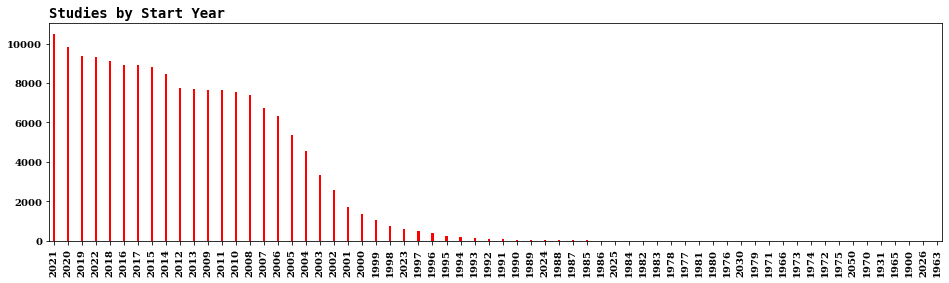

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

font = {'family' : 'DeJavu Serif',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

x = df2['Start_year'].value_counts()
x.plot(kind='bar',figsize=(16,4), width = 0.15, color = 'r')
plt.title('Studies by Start Year',
          fontsize='14',
    loc='left',
    fontweight='bold',
    family='monospace')

In [5]:
phase = df['phase'].value_counts(normalize = True)
phase

Phase 2            0.273801
Phase 1            0.194095
Phase 3            0.175817
Phase 4            0.152539
Not Applicable     0.101373
Phase 1/Phase 2    0.056816
Phase 2/Phase 3    0.027919
Early Phase 1      0.017640
Name: phase, dtype: float64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


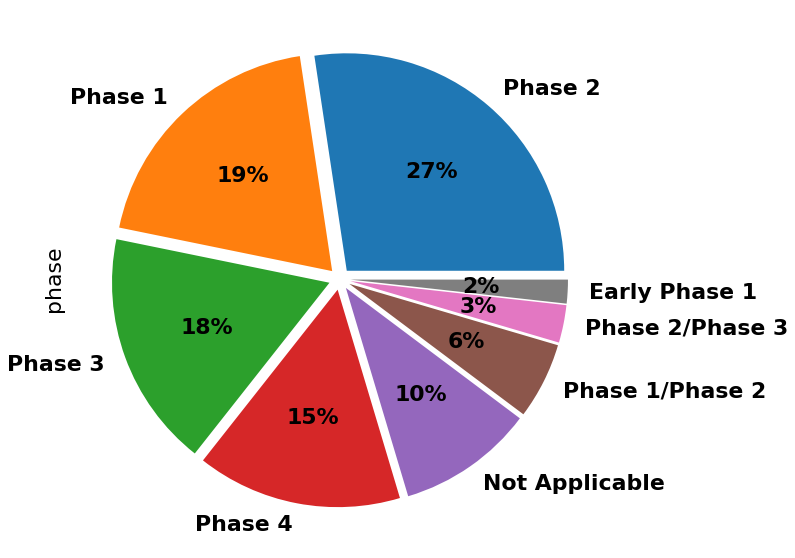

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
phase.plot(kind='pie', autopct='%1.0f%%', explode=explode, figsize=(10, 10))
plt.show()

In [7]:
#overall status?

In [8]:
status = df['overall_status'].value_counts(normalize = True)
status

Completed                    0.572065
Recruiting                   0.124008
Unknown status               0.095261
Terminated                   0.084162
Active, not recruiting       0.044251
Not yet recruiting           0.034911
Withdrawn                    0.034005
Enrolling by invitation      0.004017
Suspended                    0.003606
No longer available          0.001699
Available                    0.001055
Approved for marketing       0.000858
Temporarily not available    0.000101
Name: overall_status, dtype: float64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


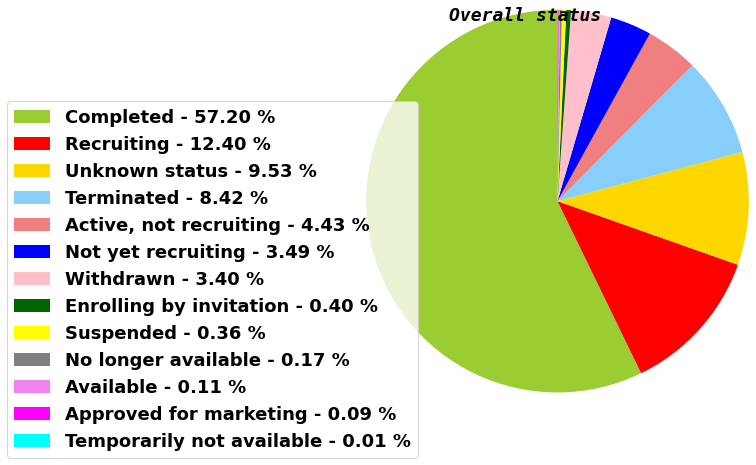

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

x = np.char.array(['Completed', 'Recruiting', 'Unknown status', 'Terminated', 'Active, not recruiting', 'Not yet recruiting','Withdrawn', 'Enrolling by invitation', 'Suspended', 'No longer available', 'Available', 'Approved for marketing', 'Temporarily not available'])
y = np.array([0.572013, 0.124027, 0.095288, 0.084156, 0.044254, 0.034923, 0.034005, 0.004013, 0.003607, 0.001699, 0.001055, 0.000859, 0.000101])
colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=2.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=18)

plt.title("Overall status",
    fontsize='18',
    loc='left',
    fontweight='bold',
    style='italic',
    family='monospace', pad=72)

plt.savefig('piechart.png', bbox_inches='tight')

In [10]:
#a total number of 10,496 started in 2021
df3 = df2.query('Start_year=="2021"')
df3

,nct_id,start_date,phase,overall_status,Start_year
15,NCT04356859,2021-04-22,Not Applicable,Recruiting,2021
30,NCT04356664,2021-03-18,Phase 2/Phase 3,Recruiting,2021
81,NCT05152498,2021-01-01,Early Phase 1,Recruiting,2021
84,NCT04351373,2021-10-06,Phase 2,Recruiting,2021
93,NCT05152186,2021-06-01,Phase 3,"Active, not recruiting",2021
...,...,...,...,...,...
167703,NCT04367935,2021-01-01,Phase 2/Phase 3,Completed,2021
167707,NCT04633902,2021-03-03,Phase 2,Recruiting,2021
167715,NCT04365660,2021-01-28,Phase 2,"Active, not recruiting",2021
167726,NCT04364620,2021-02-23,Phase 2,Recruiting,2021


In [11]:
#2021 studies by phase 
df3['phase'].value_counts(normalize = True)

Phase 2            0.284168
Phase 1            0.210622
Phase 3            0.148710
Phase 4            0.128073
Not Applicable     0.093273
Phase 1/Phase 2    0.070106
Early Phase 1      0.032676
Phase 2/Phase 3    0.032372
Name: phase, dtype: float64

In [12]:
##2021 studies by overall status; would like to know what studies that started in 2021 that have already been completed
#as at the time this data was obtained (october 2022). How is that even possible for a drug trial?
df3['overall_status'].value_counts(normalize = True)

Recruiting                 0.580412
Completed                  0.150629
Not yet recruiting         0.115282
Active, not recruiting     0.076505
Withdrawn                  0.032393
Terminated                 0.017912
Enrolling by invitation    0.017721
Suspended                  0.005526
Unknown status             0.003620
Name: overall_status, dtype: float64

In [13]:
#what is going on in 1963?
df4 = df2.query('Start_year=="1963"')
df4

,nct_id,start_date,phase,overall_status,Start_year
153778,NCT05537194,1963-01-01,NaN,Completed,1963


In [14]:
#what about 1985?
df5 = df2.query('Start_year=="1985"')
df5

,nct_id,start_date,phase,overall_status,Start_year
26953,NCT00000120,1985-01-31,Phase 3,Completed,1985
26954,NCT00000122,1985-09-30,Phase 3,Completed,1985
26960,NCT00000140,1985-09-30,Phase 3,Completed,1985
27313,NCT00000516,1985-07-31,Phase 3,Completed,1985
27314,NCT00000517,1985-07-31,Phase 3,Completed,1985
27315,NCT00000518,1985-07-31,Phase 3,Completed,1985
27316,NCT00000520,1985-07-31,Phase 2,Completed,1985
27317,NCT00000522,1985-08-31,Phase 2,Completed,1985
27972,NCT00001202,1985-01-31,Phase 2,Completed,1985
31736,NCT00004767,1985-01-31,Phase 2,Completed,1985


In [15]:
#all studies with start year 1985 are completed
df5['overall_status'].value_counts(normalize = True)

Completed    1.0
Name: overall_status, dtype: float64

In [16]:
#but at what phase were the 1985 studies completed? Only about 6% of 1985 drug studies made it to phase 4.
df5['phase'].value_counts(normalize = True)

Phase 3            0.4375
Phase 2            0.3125
Phase 1/Phase 2    0.0625
Phase 2/Phase 3    0.0625
Not Applicable     0.0625
Phase 4            0.0625
Name: phase, dtype: float64